# FRESH START

THIS SECTION IMPORTS THIS DATASET\
$H_0:μ_1=μ_2$  or $μ_1-μ_2=0$

# Introduction

The report will discuss the relationship between an individual Major League Baseball player’s Wins Above Replacement, or WAR, and the winning parentage, season outcome and Win Probability Added to the team that they played on. The null hypothesis of this report will be there that an individual’s ability to accumulate high WAR in a season will have little impact on the winning percentage of their team (μ1). Thereby, a player with a low WAR season has the same impact (μ2).

$H_0:μ_1=μ_2$  or $μ_1-μ_2=0$

The alternative hypothesis is that the higher or lower WAR gathered by a player will positively or negatively impact their team’s ability to win respectively:

$H_A:μ_1≠μ_2  or μ_1-μ_2≠0$ 

This research question is of personal and practical interest as many Baseball fans have become accustomed towards the use of WAR when discussing current and retired Baseball players. However, very few know the actual formulas and calculations required for WAR, and fewer know if a player’s WAR correlates with winning, or if it’s simply used as an individualistic stat to compare one player to another. This report will attempt to acknowledge both areas of concern, by explaining WAR in a mathematical sense, whilst also employing Statistical Analysis between WAR and team winning percentage. The report will also use the WPA a player has gathered throughout their season, and by comparing that with WAR, it may provide statistical evidence that WAR correlates and leads to winning, or reveal that WAR has little to no impact on team success. Conducting this report will allow myself to gain a deeper appreciation for the baseball statistic that I use on an everyday basis.


# Explanation of WAR and WPA
Both Wins Above Replacement and Win Probability Added involve formulas developed during the sabermetric revolution of baseball. Sabermetric analysis of baseball was popularised by Bill James to question the traditional metrics that ruled baseball evaluation and was the creation of new metrics to determine the value of players (Society for American Baseball Research, n.d.). Despite there being many different versions of WAR, FanGraphs defines WAR as:

$$
\text{WAR} = \frac{\text{Batting Runs} + \text{Base Running Runs} + \text{Fielding Runs} + \text{Positional Adjustment} + \text{League Adjustment} + \text{Replacement Runs}}{\text{Runs Per Win}}
$$

Each aspect of the formula can be broken down and explained, however in layman’s terms WAR attempts to encapsulate the overall value a player adds to a team. This includes batting, fielding and base-running. The formula takes those contributions and adds a positional adjustment which rewards players in more difficult fielding positions (figure 1). This is important as a good hitter in a hard position, like catcher, is more valuable to a team than a good-hitting designated hitter. It then adds the league adjustment, which ensures that runs above average equal 0, meaning the sum of all runs above average is balanced throughout the league. The formula then adds replacement runs, which is the difference between a replacement-level player and an average player. It is given by:

$$
\text{Replacement Runs} = 570 \left(\frac{\text{MLB Games}}{2430}\right) \left(\frac{\text{Runs Per Win}}{\text{League Plate Appearances}}\right) \times \text{Plate Appearances}
$$

Where the numeral 570 represents 57% of the 1000 WAR allocated to position players, and MLB games are how many games have been played in the MLB season at a specific point. 

Runs Per Win includes a second formula, which calculates the runs necessary to win an MLB game (usually between 9 and 10). RPW =  

$$
9 \left(\frac{\text{MLB Runs Scored}}{\text{MLB Innings Pitched}}\right) \times 1.5 + 3
$$

All that together allows for the FanGraphs calculation for WAR, however many smaller parts are included in the construction of the formula. This explanation just provides the necessary, surface-level information for how the pivotal statistic is calculated (Slowinski, 2012). 

FanGraphs Win Probability Added is easier to calculate, it uses a team’s probability of winning and is constantly changing and updating throughout the game. For example, if a player comes up to bat and the probability that his team wins the game at that moment is 20%, and the at-bat results in his team winning, he is credited with 0.8 WPA (from 20% to 100%). Inversely the pitcher who caused his team to lose is given a -0.8 WPA. WPA in a season is the sum of all events that a player has done to add, or take away from the probability that his team wins (Slowinski, 2010). For example, in 1929 Babe Ruth had a WPA of 9.4, meaning his actions throughout the season improved his teams’ ability to win by 940% (Baseball Reference, n.d.). 

It must be noted that WAR and WPA Per 162 games (a full season) will be used. As it allows for a fairer comparison between two players if their WAR and WPA are extrapolated across an entire season. It’s calculated by:

$$
\left(\frac{\text{WAR}}{\text{Games Played}}\right) \times 162
$$

$$
\left(\frac{\text{WPA}}{\text{Games Played}}\right) \times 162
$$

It should also be noted that although the number of wins required to reach the post-season changes each season, the mean number of wins of a post-season team since 1994 is 93 to 94 (Manning, 2018). This equates to a winning percentage of 0.574 to 0.580, which can be used as a guide for which teams should have made the post-season, if they played in an “average” season. 










# _impoting pandas_

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import openpyxl
import xlrd
from datetime import datetime


Some magic that tells jupyter to put graphs and things in the notebook instead of the default behaviour which is to save it as a file.

In [3]:

%matplotlib inline

# Downloading CSV For WAR

In [13]:

def load_data(filepath, url):
    if os.path.isfile(filepath):
        print("Loading from file")
        return pd.read_csv(filepath)

    print("Loading from the internet")
    response = requests.get(url)
    response.raise_for_status()

    soup = BeautifulSoup(response.content, "html.parser")
    table = soup.find("table", {"id": "players_value_batting"})
    if table is None:
        raise ValueError("Table with id 'players_value_batting' not found")

    data = pd.read_html(str(table))[0]
    data.to_csv(filepath, index=False)
    return data

filepath = "WAR_2023.csv"
url = "https://www.baseball-reference.com/leagues/majors/2023-value-batting.shtml"

try:
    WAR_2023 = load_data(filepath, url)
    print("Data loading complete")
except Exception as e:
    print(f"Data loading failed: {e}")

Loading from file
Data loading failed: 'utf-8' codec can't decode byte 0xa0 in position 117: invalid start byte


In [19]:

def get_top_50_numbers(data):
    try:
        # Extract column 2 and column 16
        column_2 = data.iloc[:, 1]  # Column 2 (index 1)
        column_16 = data.iloc[:, 15]  # Column 16 (index 15)
        
        # Combine the two columns into a new DataFrame
        combined_data = pd.DataFrame({
            'Column_2': column_2,
            'Column_16': column_16
        })
        
        # Sort the data based on column 16 in descending order
        sorted_data = combined_data.sort_values(by='Column_16', ascending=False)
        
        # Retrieve the top 50 rows based on column 16
        top_50 = sorted_data.head(50).reset_index(drop=True)
        
        # Print the results
        print(top_50)
        
    except Exception as e:
        print(f"An error occurred: {e}")

# Assuming `data` is already a DataFrame loaded with the necessary data
data = pd.read_csv("WAR_2023.csv", encoding='latin1')

# Get the top 50 numbers from column 16 and their corresponding values in column 2
get_top_50_numbers(data)


              Column_2  Column_16
0         Mookie Betts        8.3
1     Ronald Acuña Jr.        8.2
2        Marcus Semien        7.4
3          Matt Olson*        7.4
4        Corey Seager*        6.9
5     Freddie Freeman*        6.5
6    Gunnar Henderson*        6.2
7       Shohei Ohtani*        6.0
8    Francisco Lindor#        6.0
9         Austin Riley        5.9
10        Ha-Seong Kim        5.8
11          Juan Soto*        5.5
12      Wander Franco#        5.5
13  Fernando Tatis Jr.        5.5
14        Kyle Tucker*        5.4
15     Corbin Carroll*        5.4
16     Julio Rodríguez        5.3
17     Andrés Giménez*        5.3
18          Yandy Díaz        5.2
19       José Ramírez#        5.1
20      J.P. Crawford*        5.1
21        Nico Hoerner        5.1
22     Luis Robert Jr.        5.0
23        Luis Arráez*        4.9
24        Ketel Marte#        4.9
25        Alex Bregman        4.9
26         Bo Bichette        4.9
27      Dansby Swanson        4.8
28       Ozzie

Top 50 WAR Values:
Sample Mean: 5.09
Sample Median: 4.9
Sample Variance: 1.2356122448979592
Sample Standard Deviation: 1.1115809664158338
Top 50 values saved to 'top_50_values.csv'
Statistics saved to 'top_50_stats.csv'


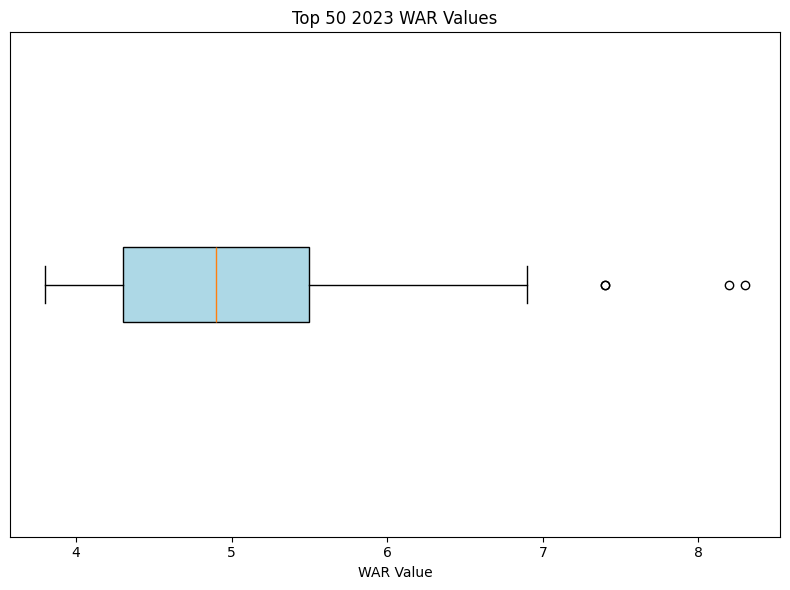

In [20]:
csv_file_path = 'WAR_2023.csv'

# Check if the file exists
if not os.path.exists(csv_file_path):
    raise FileNotFoundError(f"The file '{csv_file_path}' does not exist.")

try:
    # Attempt to read the CSV file with different encodings
    try:
        df = pd.read_csv(csv_file_path, encoding='utf-8')
    except UnicodeDecodeError:
        try:
            df = pd.read_csv(csv_file_path, encoding='latin1')
        except UnicodeDecodeError:
            df = pd.read_csv(csv_file_path, encoding='iso-8859-1')
except Exception as e:
    raise ValueError(f"Error reading the CSV file: {e}")

# Ensure the CSV file has at least 16 columns
if df.shape[1] < 16:
    raise ValueError("The CSV file does not have at least 16 columns.")

try:
    # Extract the 16th column (index 15, since indexing starts from 0)
    column_16 = df.iloc[:, 15]

    # Ensure the column contains numeric values
    column_16 = pd.to_numeric(column_16, errors='coerce')
    
    # Drop NaN values that cannot be converted to numeric
    column_16 = column_16.dropna()

    # Sort the column in descending order and select the top 50 values
    top_50_values = column_16.nlargest(50)

    # Compute statistics for top 50 values
    top_50_mean = top_50_values.mean()
    top_50_median = top_50_values.median()
    top_50_variance = top_50_values.var()
    top_50_std_dev = top_50_values.std()

    # Print the results for top 50 values
    print("Top 50 WAR Values:")
    print("Sample Mean:", top_50_mean)
    print("Sample Median:", top_50_median)
    print("Sample Variance:", top_50_variance)
    print("Sample Standard Deviation:", top_50_std_dev)

    # Save the top 50 values and their statistics to a new CSV file
    top_50_values.to_csv('top_50_values.csv', index=False)
    top_50_stats_df = pd.DataFrame({
        'Statistic': ['Sample Mean', 'Sample Median', 'Sample Variance', 'Sample Standard Deviation'],
        'Value': [top_50_mean, top_50_median, top_50_variance, top_50_std_dev]
    })
    top_50_stats_df.to_csv('top_50_stats.csv', index=False)
    print("Top 50 values saved to 'top_50_values.csv'")
    print("Statistics saved to 'top_50_stats.csv'")

    # Create box plot for top 50 values
    plt.figure(figsize=(8, 6))
    plt.boxplot(top_50_values, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    plt.title('Top 50 2023 WAR Values')
    plt.xlabel('WAR Value')
    plt.yticks([])  # Remove the left side numbers

    # Show the box plot
    plt.tight_layout()
    plt.show()

except Exception as e:
    raise ValueError(f"Error processing the 16th column: {e}")


collecting the top 50 war vales team wining percentages

In [23]:

csv_file_path = 'WAR_2023.csv'

# Check if the file exists
if not os.path.exists(csv_file_path):
    raise FileNotFoundError(f"The file '{csv_file_path}' does not exist.")

try:
    # Attempt to read the CSV file with different encodings
    try:
        df = pd.read_csv(csv_file_path, encoding='utf-8')
    except UnicodeDecodeError:
        try:
            df = pd.read_csv(csv_file_path, encoding='latin1')
        except UnicodeDecodeError:
            df = pd.read_csv(csv_file_path, encoding='iso-8859-1')
except Exception as e:
    raise ValueError(f"Error reading the CSV file: {e}")

# Ensure the CSV file has at least 18 columns
if df.shape[1] < 18:
    raise ValueError("The CSV file does not have at least 18 columns.")

try:
    # Extract the 15th column (index 14, since indexing starts from 0)
    column_15 = df.iloc[:, 14]

    # Ensure the column contains numeric values
    column_15 = pd.to_numeric(column_15, errors='coerce')
    
    # Drop NaN values that cannot be converted to numeric
    column_15 = column_15.dropna()

    # Sort the column in descending order and select the top 50 values
    top_50_indices = column_15.nlargest(50).index

    # Extract the 18th column (index 17) for these top 50 players
    column_18_top_50 = df.iloc[top_50_indices, 17]

    # Print the corresponding data in column 18 for the top 50 players
    print("Column 18 Data for Top 50 Players based on Column 15:")
    print(column_18_top_50.to_string(index=False))

except Exception as e:
    raise ValueError(f"Error processing the data: {e}")


Column 18 Data for Top 50 Players based on Column 15:
0.538
0.539
0.532
0.531
0.532
0.527
0.528
0.525
0.524
0.523
0.523
0.520
0.521
0.522
0.524
0.519
0.520
0.520
0.519
0.520
0.519
0.518
0.518
0.518
0.519
0.517
0.519
0.516
0.517
0.519
0.514
0.516
0.518
0.515
0.518
0.519
0.513
0.514
0.513
0.513
0.514
0.515
0.514
0.516
0.512
0.511
0.511
0.513
0.512
0.515


Statistics for Column 18 Data of Top 50 Players based on Column 15:
Mean: 0.51946
Median: 0.5185
Variance: 4.225346938775519e-05
Standard Deviation: 0.006500266870502717


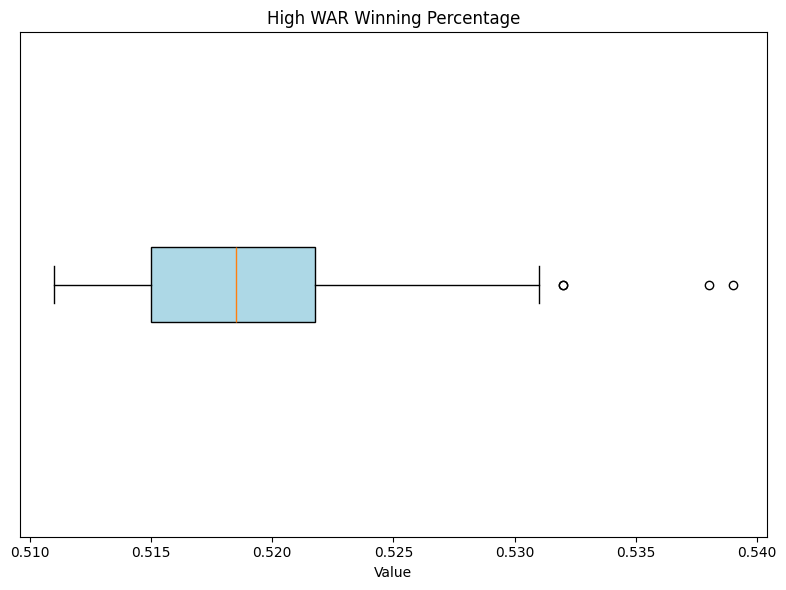

In [30]:

# Define the path to your CSV file
csv_file_path = 'WAR_2023.csv'

# Check if the file exists
if not os.path.exists(csv_file_path):
    raise FileNotFoundError(f"The file '{csv_file_path}' does not exist.")

try:
    # Attempt to read the CSV file with different encodings
    try:
        df = pd.read_csv(csv_file_path, encoding='utf-8')
    except UnicodeDecodeError:
        try:
            df = pd.read_csv(csv_file_path, encoding='latin1')
        except UnicodeDecodeError:
            df = pd.read_csv(csv_file_path, encoding='iso-8859-1')
except Exception as e:
    raise ValueError(f"Error reading the CSV file: {e}")

# Ensure the CSV file has at least 18 columns
if df.shape[1] < 18:
    raise ValueError("The CSV file does not have at least 18 columns.")

try:
    # Extract the 15th column (index 14, since indexing starts from 0)
    column_15 = df.iloc[:, 14]

    # Ensure the column contains numeric values
    column_15 = pd.to_numeric(column_15, errors='coerce')
    
    # Drop NaN values that cannot be converted to numeric
    column_15 = column_15.dropna()

    # Sort the column in descending order and select the top 50 values
    top_50_indices = column_15.nlargest(50).index

    # Extract the 18th column (index 17) for these top 50 players
    column_18_top_50 = df.iloc[top_50_indices, 17]

    # Calculate statistics for column 18 data
    mean = column_18_top_50.mean()
    median = column_18_top_50.median()
    variance = column_18_top_50.var()
    std_dev = column_18_top_50.std()

    # Print the calculated statistics
    print("Statistics for Column 18 Data of Top 50 Players based on Column 15:")
    print("Mean:", mean)
    print("Median:", median)
    print("Variance:", variance)
    print("Standard Deviation:", std_dev)

    # Create box plot for the data in column 18
    plt.figure(figsize=(8, 6))
    plt.boxplot(column_18_top_50, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    plt.title('High WAR Winning Percentage')
    plt.xlabel('Value')
    plt.yticks([])  # Remove the left side numbers

    # Show the box plot
    plt.tight_layout()
    plt.show()

except Exception as e:
    raise ValueError(f"Error processing the data: {e}")



Statistics for Column 18 of Top 50 Values (Multiplied by 100):
Sample Mean: 51.946000000000005
Sample Median: 51.85
Sample Variance: 0.4225346938775519
Sample Standard Deviation: 0.6500266870502717
Top 50 combined values saved to 'top_50_combined.csv'
Statistics for column 18 saved to 'top_50_stats_column_18.csv'


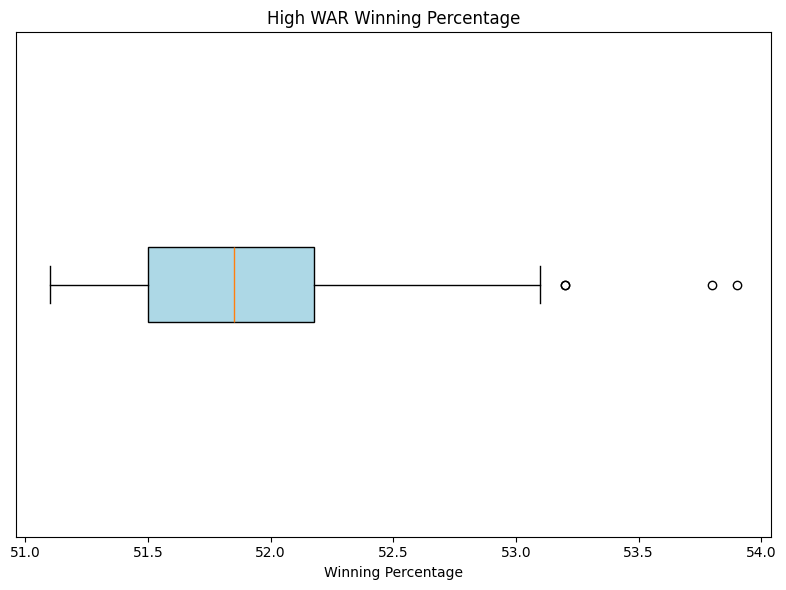

In [53]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the path to your CSV file
csv_file_path = 'WAR_2023.csv'

# Check if the file exists
if not os.path.exists(csv_file_path):
    raise FileNotFoundError(f"The file '{csv_file_path}' does not exist.")

try:
    # Attempt to read the CSV file with different encodings
    try:
        df = pd.read_csv(csv_file_path, encoding='utf-8')
    except UnicodeDecodeError:
        try:
            df = pd.read_csv(csv_file_path, encoding='latin1')
        except UnicodeDecodeError:
            df = pd.read_csv(csv_file_path, encoding='iso-8859-1')
except Exception as e:
    raise ValueError(f"Error reading the CSV file: {e}")

# Ensure the CSV file has at least 18 columns
if df.shape[1] < 18:
    raise ValueError("The CSV file does not have at least 18 columns.")

try:
    # Extract the 15th column (index 14, since indexing starts from 0)
    column_15 = df.iloc[:, 14]

    # Ensure the column contains numeric values
    column_15 = pd.to_numeric(column_15, errors='coerce')
    
    # Drop NaN values that cannot be converted to numeric
    column_15 = column_15.dropna()

    # Sort the column in descending order and select the top 50 values
    top_50_indices = column_15.nlargest(50).index

    # Extract the corresponding 18th column (index 17) values
    column_18_top_50 = df.iloc[top_50_indices, 17]

    # Ensure the column contains numeric values
    column_18_top_50 = pd.to_numeric(column_18_top_50, errors='coerce')
    
    # Drop NaN values that cannot be converted to numeric
    column_18_top_50 = column_18_top_50.dropna()

    # Multiply the data in column 18 by 100
    column_18_top_50 *= 100

    # Compute statistics for the 18th column of the top 50 values
    column_18_mean = column_18_top_50.mean()
    column_18_median = column_18_top_50.median()
    column_18_variance = column_18_top_50.var()
    column_18_std_dev = column_18_top_50.std()

    # Print the statistics for the 18th column of the top 50 values
    print("Statistics for Column 18 of Top 50 Values (Multiplied by 100):")
    print("Sample Mean:", column_18_mean)
    print("Sample Median:", column_18_median)
    print("Sample Variance:", column_18_variance)
    print("Sample Standard Deviation:", column_18_std_dev)

    # Save the top 50 values and their statistics to a new CSV file
    combined_df = pd.DataFrame({
        'Column 15': column_15.loc[top_50_indices],
        'Column 18': column_18_top_50
    })
    combined_df.to_csv('top_50_combined.csv', index=False)
    top_50_stats_df = pd.DataFrame({
        'Statistic': ['Sample Mean', 'Sample Median', 'Sample Variance', 'Sample Standard Deviation'],
        'Value': [column_18_mean, column_18_median, column_18_variance, column_18_std_dev]
    })
    top_50_stats_df.to_csv('top_50_stats_column_18.csv', index=False)
    print("Top 50 combined values saved to 'top_50_combined.csv'")
    print("Statistics for column 18 saved to 'top_50_stats_column_18.csv'")

    # Create box plot for corresponding column 18 values
    plt.figure(figsize=(8, 6))
    plt.boxplot(column_18_top_50, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    plt.title('High WAR Winning Percentage')
    plt.xlabel('Winning Percentage')
    plt.yticks([])  # Remove the left side numbers
    plt.tight_layout()
    plt.show()

except Exception as e:
    raise ValueError(f"Error processing the data: {e}")


In [31]:

def get_bottom_50_numbers(data):
    try:
        # Extract column 2 and column 16
        column_2 = data.iloc[:, 1]  # Column 2 (index 1)
        column_16 = data.iloc[:, 15]  # Column 16 (index 15)
        
        # Combine the two columns into a new DataFrame
        combined_data = pd.DataFrame({
            'Column_2': column_2,
            'Column_16': column_16
        })
        
        # Sort the data based on column 16 in ascending order
        sorted_data = combined_data.sort_values(by='Column_16', ascending=True)
        
        # Retrieve the bottom 50 rows based on column 16
        bottom_50 = sorted_data.head(50).reset_index(drop=True)
        
        # Print the results
        print(bottom_50)
        
    except Exception as e:
        print(f"An error occurred: {e}")

# Assuming `data` is already a DataFrame loaded with the necessary data
data = pd.read_csv("WAR_2023.csv", encoding='latin1')

# Get the bottom 50 numbers from column 16 and their corresponding values in column 2
get_bottom_50_numbers(data)


             Column_2  Column_16
0        Tim Anderson       -2.0
1         Jean Segura       -1.9
2        Oscar Colás*       -1.5
3       Gavin Sheets*       -1.5
4     Michael Toglia#       -1.5
5         Nick Maton*       -1.5
6    Oswaldo Cabrera#       -1.5
7        Trey Mancini       -1.4
8      Oscar González       -1.4
9      Harold Castro*       -1.4
10        Henry Davis       -1.4
11       Nick Pratto*       -1.3
12  Jurickson Profar#       -1.3
13  Brandon Crawford*       -1.3
14   Eduardo Escobar#       -1.1
15  Tyler Soderstrom*       -1.1
16        Jordan Diaz       -1.1
17      Austin Barnes       -1.1
18      Cam Gallagher       -1.1
19      Austin Hedges       -1.1
20       Mark Vientos       -1.1
21         Tony Kemp*       -1.0
22        Kris Bryant       -1.0
23       Jake Bauers*       -0.9
24         Eric Haase       -0.9
25       Jared Walsh*       -0.9
26      Danny Mendick       -0.9
27       Aledmys Díaz       -0.9
28       Kolten Wong*       -0.9
29     Col

Low WAR Values:
Sample Mean: -1.022
Sample Median: -0.9
Sample Variance: 0.11930204081632655
Sample Standard Deviation: 0.3454012750647087
Bottom 50 values saved to 'bottom_50_values.csv'
Statistics saved to 'bottom_50_stats.csv'


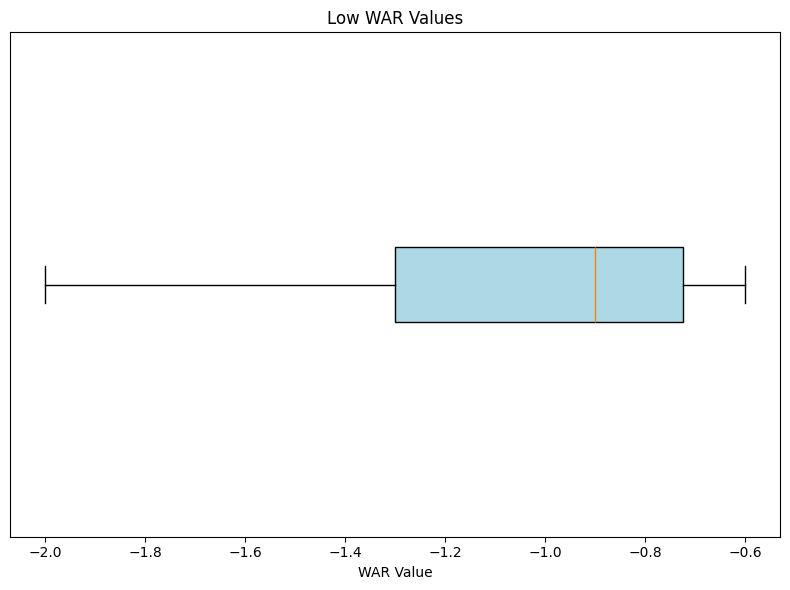

In [36]:
# Define the path to your CSV file
csv_file_path = 'WAR_2023.csv'

# Check if the file exists
if not os.path.exists(csv_file_path):
    raise FileNotFoundError(f"The file '{csv_file_path}' does not exist.")

try:
    # Attempt to read the CSV file with different encodings
    try:
        df = pd.read_csv(csv_file_path, encoding='utf-8')
    except UnicodeDecodeError:
        try:
            df = pd.read_csv(csv_file_path, encoding='latin1')
        except UnicodeDecodeError:
            df = pd.read_csv(csv_file_path, encoding='iso-8859-1')
except Exception as e:
    raise ValueError(f"Error reading the CSV file: {e}")

# Ensure the CSV file has at least 16 columns
if df.shape[1] < 16:
    raise ValueError("The CSV file does not have at least 16 columns.")

try:
    # Extract the 16th column (index 15, since indexing starts from 0)
    column_16 = df.iloc[:, 15]

    # Ensure the column contains numeric values
    column_16 = pd.to_numeric(column_16, errors='coerce')
    
    # Drop NaN values that cannot be converted to numeric
    column_16 = column_16.dropna()

    # Sort the column in ascending order and select the bottom 50 values
    bottom_50_values = column_16.nsmallest(50)

    # Compute statistics for bottom 50 values
    bottom_50_mean = bottom_50_values.mean()
    bottom_50_median = bottom_50_values.median()
    bottom_50_variance = bottom_50_values.var()
    bottom_50_std_dev = bottom_50_values.std()

    # Print the results for bottom 50 values
    print("Low WAR Values:")
    print("Sample Mean:", bottom_50_mean)
    print("Sample Median:", bottom_50_median)
    print("Sample Variance:", bottom_50_variance)
    print("Sample Standard Deviation:", bottom_50_std_dev)

    # Save the bottom 50 values and their statistics to a new CSV file
    bottom_50_values.to_csv('bottom_50_values.csv', index=False)
    bottom_50_stats_df = pd.DataFrame({
        'Statistic': ['Sample Mean', 'Sample Median', 'Sample Variance', 'Sample Standard Deviation'],
        'Value': [bottom_50_mean, bottom_50_median, bottom_50_variance, bottom_50_std_dev]
    })
    bottom_50_stats_df.to_csv('bottom_50_stats.csv', index=False)
    print("Bottom 50 values saved to 'bottom_50_values.csv'")
    print("Statistics saved to 'bottom_50_stats.csv'")

    # Create box plot for bottom 50 values
    plt.figure(figsize=(8, 6))
    plt.boxplot(bottom_50_values, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    plt.title('Low WAR Values')
    plt.xlabel('WAR Value')
    plt.yticks([])  # Remove the left side numbers

    # Show the box plot
    plt.tight_layout()
    plt.show()

except Exception as e:
    raise ValueError(f"Error processing the 16th column: {e}")


Statistics for Column 18 of Low WAR Values:
Sample Mean: 0.48926000000000003
Sample Median: 0.489
Sample Variance: 1.6808571428571462e-05
Sample Standard Deviation: 0.004099825780270604
Bottom 50 combined values saved to 'bottom_50_combined.csv'
Statistics for column 18 saved to 'bottom_50_stats_column_18.csv'


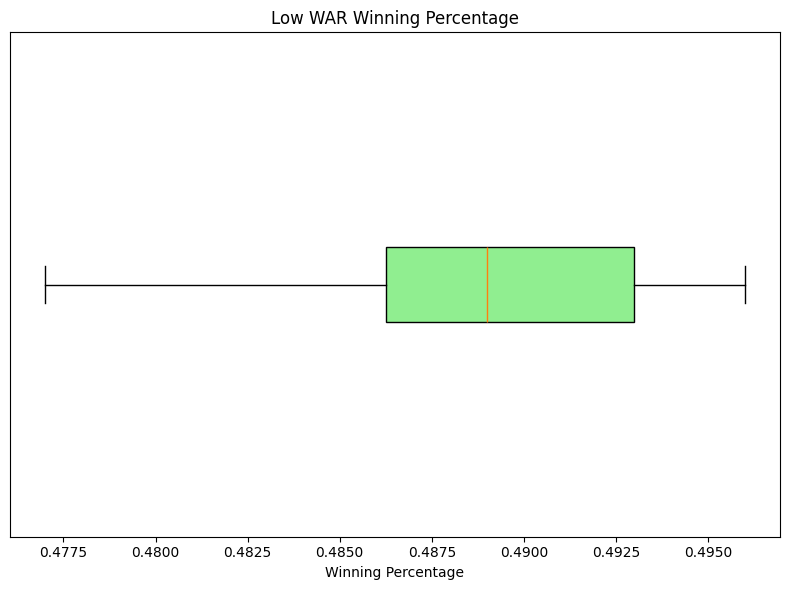

In [42]:
# Define the path to your CSV file
csv_file_path = 'WAR_2023.csv'

# Check if the file exists
if not os.path.exists(csv_file_path):
    raise FileNotFoundError(f"The file '{csv_file_path}' does not exist.")

try:
    # Attempt to read the CSV file with different encodings
    try:
        df = pd.read_csv(csv_file_path, encoding='utf-8')
    except UnicodeDecodeError:
        try:
            df = pd.read_csv(csv_file_path, encoding='latin1')
        except UnicodeDecodeError:
            df = pd.read_csv(csv_file_path, encoding='iso-8859-1')
except Exception as e:
    raise ValueError(f("Error reading the CSV file: {e}"))

# Ensure the CSV file has at least 18 columns
if df.shape[1] < 18:
    raise ValueError("The CSV file does not have at least 18 columns.")

try:
    # Extract the 16th column (index 15, since indexing starts from 0)
    column_16 = df.iloc[:, 15]

    # Ensure the column contains numeric values
    column_16 = pd.to_numeric(column_16, errors='coerce')
    
    # Drop NaN values that cannot be converted to numeric
    column_16 = column_16.dropna()

    # Sort the column in ascending order and select the bottom 50 values
    bottom_50_values = column_16.nsmallest(50)

    # Get the indices of the bottom 50 values
    bottom_50_indices = bottom_50_values.index

    # Extract the corresponding 18th column (index 17, since indexing starts from 0) values
    bottom_50_column_18 = df.iloc[bottom_50_indices, 17]

    # Ensure the column contains numeric values
    bottom_50_column_18 = pd.to_numeric(bottom_50_column_18, errors='coerce')
    
    # Drop NaN values that cannot be converted to numeric
    bottom_50_column_18 = bottom_50_column_18.dropna()

    # Compute statistics for the 18th column of the bottom 50 values
    column_18_mean = bottom_50_column_18.mean()
    column_18_median = bottom_50_column_18.median()
    column_18_variance = bottom_50_column_18.var()
    column_18_std_dev = bottom_50_column_18.std()

    # Print the statistics for the 18th column of the bottom 50 values
    print("Statistics for Column 18 of Low WAR Values:")
    print("Sample Mean:", column_18_mean)
    print("Sample Median:", column_18_median)
    print("Sample Variance:", column_18_variance)
    print("Sample Standard Deviation:", column_18_std_dev)

    # Save the bottom 50 values and their statistics to a new CSV file
    combined_df = pd.DataFrame({
        'Column 16': bottom_50_values,
        'Column 18': bottom_50_column_18
    })
    combined_df.to_csv('bottom_50_combined.csv', index=False)
    bottom_50_stats_df = pd.DataFrame({
        'Statistic': ['Sample Mean', 'Sample Median', 'Sample Variance', 'Sample Standard Deviation'],
        'Value': [column_18_mean, column_18_median, column_18_variance, column_18_std_dev]
    })
    bottom_50_stats_df.to_csv('bottom_50_stats_column_18.csv', index=False)
    print("Bottom 50 combined values saved to 'bottom_50_combined.csv'")
    print("Statistics for column 18 saved to 'bottom_50_stats_column_18.csv'")

    # Create box plot for corresponding column 18 values
    plt.figure(figsize=(8, 6))
    plt.boxplot(bottom_50_column_18, vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
    plt.title('Low WAR Winning Percentage')
    plt.xlabel('Winning Percentage')
    plt.yticks([])  # Remove the left side numbers
    plt.tight_layout()
    plt.show()

except Exception as e:
    raise ValueError(f("Error processing the 16th column: {e}"))


Statistics for Column 18 of Low WAR Values (Multiplied by 100):
Sample Mean: 48.926
Sample Median: 48.9
Sample Variance: 0.1680857142857148
Sample Standard Deviation: 0.40998257802706056
Bottom 50 combined values saved to 'bottom_50_combined.csv'
Statistics for column 18 saved to 'bottom_50_stats_column_18.csv'


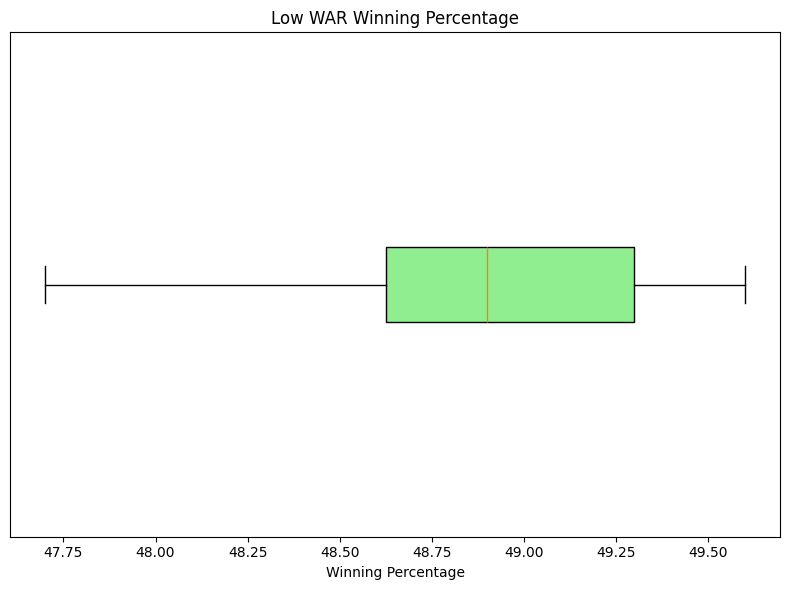

In [52]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the path to your CSV file
csv_file_path = 'WAR_2023.csv'

# Check if the file exists
if not os.path.exists(csv_file_path):
    raise FileNotFoundError(f"The file '{csv_file_path}' does not exist.")

try:
    # Attempt to read the CSV file with different encodings
    try:
        df = pd.read_csv(csv_file_path, encoding='utf-8')
    except UnicodeDecodeError:
        try:
            df = pd.read_csv(csv_file_path, encoding='latin1')
        except UnicodeDecodeError:
            df = pd.read_csv(csv_file_path, encoding='iso-8859-1')
except Exception as e:
    raise ValueError(f"Error reading the CSV file: {e}")

# Ensure the CSV file has at least 18 columns
if df.shape[1] < 18:
    raise ValueError("The CSV file does not have at least 18 columns.")

try:
    # Extract the 16th column (index 15, since indexing starts from 0)
    column_16 = df.iloc[:, 15]

    # Ensure the column contains numeric values
    column_16 = pd.to_numeric(column_16, errors='coerce')
    
    # Drop NaN values that cannot be converted to numeric
    column_16 = column_16.dropna()

    # Sort the column in ascending order and select the bottom 50 values
    bottom_50_values = column_16.nsmallest(50)

    # Get the indices of the bottom 50 values
    bottom_50_indices = bottom_50_values.index

    # Extract the corresponding 18th column (index 17, since indexing starts from 0) values
    bottom_50_column_18 = df.iloc[bottom_50_indices, 17]

    # Ensure the column contains numeric values
    bottom_50_column_18 = pd.to_numeric(bottom_50_column_18, errors='coerce')
    
    # Drop NaN values that cannot be converted to numeric
    bottom_50_column_18 = bottom_50_column_18.dropna()

    # Multiply the data in column 18 by 100
    bottom_50_column_18 *= 100

    # Compute statistics for the 18th column of the bottom 50 values
    column_18_mean = bottom_50_column_18.mean()
    column_18_median = bottom_50_column_18.median()
    column_18_variance = bottom_50_column_18.var()
    column_18_std_dev = bottom_50_column_18.std()

    # Print the statistics for the 18th column of the bottom 50 values
    print("Statistics for Column 18 of Low WAR Values (Multiplied by 100):")
    print("Sample Mean:", column_18_mean)
    print("Sample Median:", column_18_median)
    print("Sample Variance:", column_18_variance)
    print("Sample Standard Deviation:", column_18_std_dev)

    # Save the bottom 50 values and their statistics to a new CSV file
    combined_df = pd.DataFrame({
        'Column 16': bottom_50_values,
        'Column 18': bottom_50_column_18
    })
    combined_df.to_csv('bottom_50_combined.csv', index=False)
    bottom_50_stats_df = pd.DataFrame({
        'Statistic': ['Sample Mean', 'Sample Median', 'Sample Variance', 'Sample Standard Deviation'],
        'Value': [column_18_mean, column_18_median, column_18_variance, column_18_std_dev]
    })
    bottom_50_stats_df.to_csv('bottom_50_stats_column_18.csv', index=False)
    print("Bottom 50 combined values saved to 'bottom_50_combined.csv'")
    print("Statistics for column 18 saved to 'bottom_50_stats_column_18.csv'")

    # Create box plot for corresponding column 18 values
    plt.figure(figsize=(8, 6))
    plt.boxplot(bottom_50_column_18, vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
    plt.title('Low WAR Winning Percentage')
    plt.xlabel('Winning Percentage')
    plt.yticks([])  # Remove the left side numbers
    plt.tight_layout()
    plt.show()

except Exception as e:
    raise ValueError(f"Error processing the 16th column: {e}")


Statistics for Column 18 of Low WAR Values (as percentages):
Sample Mean: 48.926
Sample Median: 48.9
Sample Variance: 0.1680857142857148
Sample Standard Deviation: 0.40998257802706056
Bottom 50 combined values saved to 'bottom_50_combined.csv'
Statistics for column 18 saved to 'bottom_50_stats_column_18.csv'


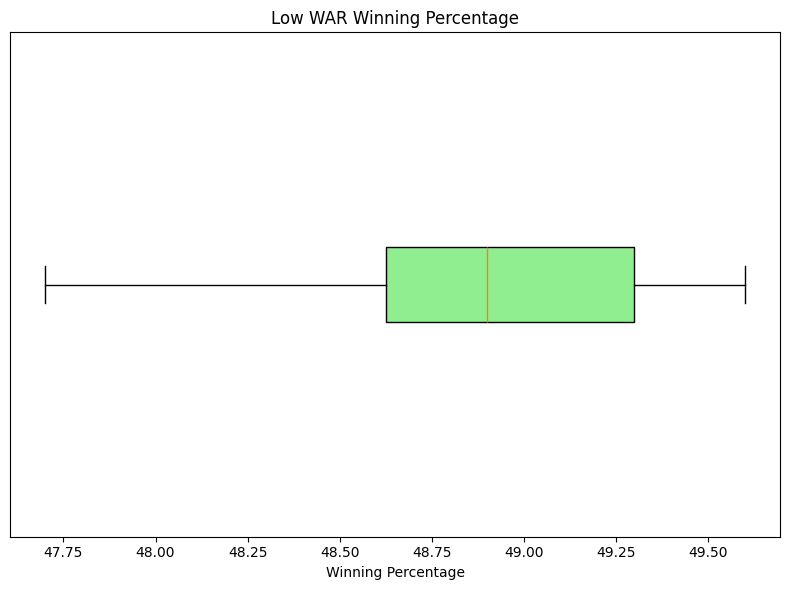

In [49]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the path to your CSV file
csv_file_path = 'WAR_2023.csv'

# Check if the file exists
if not os.path.exists(csv_file_path):
    raise FileNotFoundError(f"The file '{csv_file_path}' does not exist.")

try:
    # Attempt to read the CSV file with different encodings
    try:
        df = pd.read_csv(csv_file_path, encoding='utf-8')
    except UnicodeDecodeError:
        try:
            df = pd.read_csv(csv_file_path, encoding='latin1')
        except UnicodeDecodeError:
            df = pd.read_csv(csv_file_path, encoding='iso-8859-1')
except Exception as e:
    raise ValueError(f"Error reading the CSV file: {e}")

# Ensure the CSV file has at least 18 columns
if df.shape[1] < 18:
    raise ValueError("The CSV file does not have at least 18 columns.")

try:
    # Extract the 16th column (index 15, since indexing starts from 0)
    column_16 = df.iloc[:, 15]

    # Ensure the column contains numeric values
    column_16 = pd.to_numeric(column_16, errors='coerce')
    
    # Drop NaN values that cannot be converted to numeric
    column_16 = column_16.dropna()

    # Sort the column in ascending order and select the bottom 50 values
    bottom_50_values = column_16.nsmallest(50)

    # Get the indices of the bottom 50 values
    bottom_50_indices = bottom_50_values.index

    # Extract the corresponding 18th column (index 17, since indexing starts from 0) values
    bottom_50_column_18 = df.iloc[bottom_50_indices, 17]

    # Ensure the column contains numeric values
    bottom_50_column_18 = pd.to_numeric(bottom_50_column_18, errors='coerce')
    
    # Drop NaN values that cannot be converted to numeric
    bottom_50_column_18 = bottom_50_column_18.dropna()

    # Multiply by 100 to convert to percentages
    bottom_50_column_18 *= 100

    # Compute statistics for the 18th column of the bottom 50 values
    column_18_mean = bottom_50_column_18.mean()
    column_18_median = bottom_50_column_18.median()
    column_18_variance = bottom_50_column_18.var()
    column_18_std_dev = bottom_50_column_18.std()

    # Print the statistics for the 18th column of the bottom 50 values
    print("Statistics for Column 18 of Low WAR Values (as percentages):")
    print("Sample Mean:", column_18_mean)
    print("Sample Median:", column_18_median)
    print("Sample Variance:", column_18_variance)
    print("Sample Standard Deviation:", column_18_std_dev)

    # Save the bottom 50 values and their statistics to a new CSV file
    combined_df = pd.DataFrame({
        'Column 16': bottom_50_values,
        'Column 18': bottom_50_column_18
    })
    combined_df.to_csv('bottom_50_combined.csv', index=False)
    bottom_50_stats_df = pd.DataFrame({
        'Statistic': ['Sample Mean', 'Sample Median', 'Sample Variance', 'Sample Standard Deviation'],
        'Value': [column_18_mean, column_18_median, column_18_variance, column_18_std_dev]
    })
    bottom_50_stats_df.to_csv('bottom_50_stats_column_18.csv', index=False)
    print("Bottom 50 combined values saved to 'bottom_50_combined.csv'")
    print("Statistics for column 18 saved to 'bottom_50_stats_column_18.csv'")

    # Create box plot for corresponding column 18 values
    plt.figure(figsize=(8, 6))
    plt.boxplot(bottom_50_column_18, vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
    plt.title('Low WAR Winning Percentage')
    plt.xlabel('Winning Percentage')
    plt.yticks([])  # Remove the left side numbers
    plt.tight_layout()
    plt.show()

except Exception as e:
    raise ValueError(f"Error processing the 16th column: {e}")


Statistics for Column 18 of Low WAR Values (Multiplied by 100):
Sample Mean: 48.926
Sample Median: 48.9
Sample Variance: 0.1680857142857148
Sample Standard Deviation: 0.40998257802706056
Bottom 50 combined values saved to 'bottom_50_combined.csv'
Statistics for column 18 saved to 'bottom_50_stats_column_18.csv'


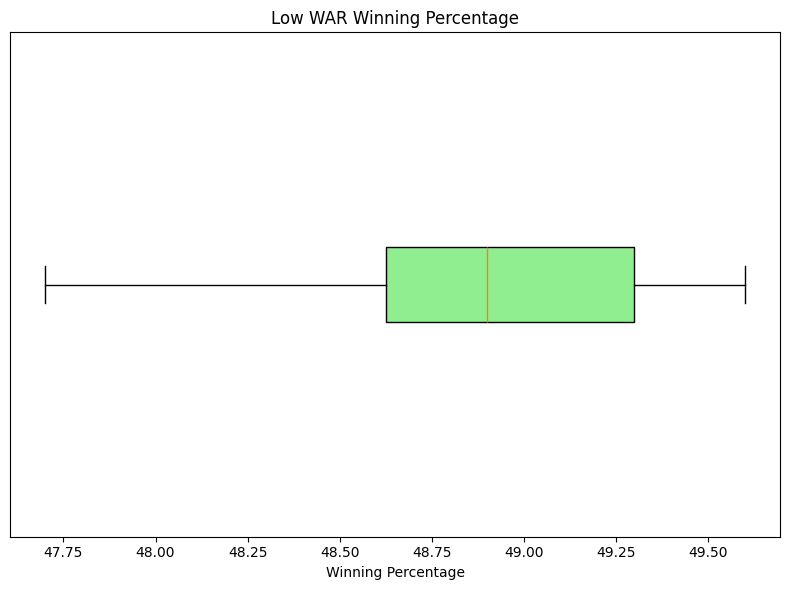

In [51]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the path to your CSV file
csv_file_path = 'WAR_2023.csv'

# Check if the file exists
if not os.path.exists(csv_file_path):
    raise FileNotFoundError(f"The file '{csv_file_path}' does not exist.")

try:
    # Attempt to read the CSV file with different encodings
    try:
        df = pd.read_csv(csv_file_path, encoding='utf-8')
    except UnicodeDecodeError:
        try:
            df = pd.read_csv(csv_file_path, encoding='latin1')
        except UnicodeDecodeError:
            df = pd.read_csv(csv_file_path, encoding='iso-8859-1')
except Exception as e:
    raise ValueError(f"Error reading the CSV file: {e}")

# Ensure the CSV file has at least 18 columns
if df.shape[1] < 18:
    raise ValueError("The CSV file does not have at least 18 columns.")

try:
    # Extract the 16th column (index 15, since indexing starts from 0)
    column_16 = df.iloc[:, 15]

    # Ensure the column contains numeric values
    column_16 = pd.to_numeric(column_16, errors='coerce')
    
    # Drop NaN values that cannot be converted to numeric
    column_16 = column_16.dropna()

    # Sort the column in ascending order and select the bottom 50 values
    bottom_50_values = column_16.nsmallest(50)

    # Get the indices of the bottom 50 values
    bottom_50_indices = bottom_50_values.index

    # Extract the corresponding 18th column (index 17, since indexing starts from 0) values
    bottom_50_column_18 = df.iloc[bottom_50_indices, 17]

    # Ensure the column contains numeric values
    bottom_50_column_18 = pd.to_numeric(bottom_50_column_18, errors='coerce')
    
    # Drop NaN values that cannot be converted to numeric
    bottom_50_column_18 = bottom_50_column_18.dropna()

    # Multiply the data in column 18 by 100
    bottom_50_column_18 *= 100

    # Compute statistics for the 18th column of the bottom 50 values
    column_18_mean = bottom_50_column_18.mean()
    column_18_median = bottom_50_column_18.median()
    column_18_variance = bottom_50_column_18.var()
    column_18_std_dev = bottom_50_column_18.std()

    # Print the statistics for the 18th column of the bottom 50 values
    print("Statistics for Column 18 of Low WAR Values (Multiplied by 100):")
    print("Sample Mean:", column_18_mean)
    print("Sample Median:", column_18_median)
    print("Sample Variance:", column_18_variance)
    print("Sample Standard Deviation:", column_18_std_dev)

    # Save the bottom 50 values and their statistics to a new CSV file
    combined_df = pd.DataFrame({
        'Column 16': bottom_50_values,
        'Column 18': bottom_50_column_18
    })
    combined_df.to_csv('bottom_50_combined.csv', index=False)
    bottom_50_stats_df = pd.DataFrame({
        'Statistic': ['Sample Mean', 'Sample Median', 'Sample Variance', 'Sample Standard Deviation'],
        'Value': [column_18_mean, column_18_median, column_18_variance, column_18_std_dev]
    })
    bottom_50_stats_df.to_csv('bottom_50_stats_column_18.csv', index=False)
    print("Bottom 50 combined values saved to 'bottom_50_combined.csv'")
    print("Statistics for column 18 saved to 'bottom_50_stats_column_18.csv'")

    # Create box plot for corresponding column 18 values
    plt.figure(figsize=(8, 6))
    plt.boxplot(bottom_50_column_18, vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
    plt.title('Low WAR Winning Percentage')
    plt.xlabel('Winning Percentage')
    plt.yticks([])  # Remove the left side numbers
    plt.tight_layout()
    plt.show()

except Exception as e:
    raise ValueError(f"Error processing the 16th column: {e}")


In [45]:
import os
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go

# Define the path to your CSV file
csv_file_path = 'WAR_2023.csv'

# Check if the file exists
if not os.path.exists(csv_file_path):
    raise FileNotFoundError(f"The file '{csv_file_path}' does not exist.")

try:
    # Attempt to read the CSV file with different encodings
    try:
        df = pd.read_csv(csv_file_path, encoding='utf-8')
    except UnicodeDecodeError:
        try:
            df = pd.read_csv(csv_file_path, encoding='latin1')
        except UnicodeDecodeError:
            df = pd.read_csv(csv_file_path, encoding='iso-8859-1')
except Exception as e:
    raise ValueError(f"Error reading the CSV file: {e}")

# Ensure the CSV file has at least 18 columns
if df.shape[1] < 18:
    raise ValueError("The CSV file does not have at least 18 columns.")

try:
    # Extract the 16th column (index 15, since indexing starts from 0)
    column_16 = df.iloc[:, 15]

    # Ensure the column contains numeric values
    column_16 = pd.to_numeric(column_16, errors='coerce')
    
    # Drop NaN values that cannot be converted to numeric
    column_16 = column_16.dropna()

    # Sort the column in descending order and select the top 50 values
    top_50_values = column_16.nlargest(50)

    # Sort the column in ascending order and select the bottom 50 values
    bottom_50_values = column_16.nsmallest(50)

    # Extract the corresponding 18th column (index 17, since indexing starts from 0) values
    top_50_column_18 = df.iloc[top_50_values.index, 17]
    bottom_50_column_18 = df.iloc[bottom_50_values.index, 17]

    # Ensure the columns contain numeric values
    top_50_column_18 = pd.to_numeric(top_50_column_18, errors='coerce').dropna()
    bottom_50_column_18 = pd.to_numeric(bottom_50_column_18, errors='coerce').dropna()

    # Create a DataFrame for Plotly
    plot_df = pd.DataFrame({
        'WAR Value': pd.concat([top_50_values, bottom_50_values]),
        'Winning Percentage': pd.concat([top_50_column_18, bottom_50_column_18]),
        'Group': ['Top 50'] * len(top_50_values) + ['Bottom 50'] * len(bottom_50_values)
    })

    # Create the interactive plot
    fig = px.scatter(
        plot_df,
        x='WAR Value',
        y='Winning Percentage',
        color='Group',
        title='Top 50 vs Bottom 50 WAR Values and Winning Percentages',
        labels={'WAR Value': 'WAR Value', 'Winning Percentage': 'Winning Percentage'}
    )

    fig.update_layout(legend_title_text='Group')
    fig.show()

except Exception as e:
    raise ValueError(f"Error processing the columns: {e}")


In [47]:

# Define the path to your CSV file
csv_file_path = 'WAR_2023.csv'

# Check if the file exists
if not os.path.exists(csv_file_path):
    raise FileNotFoundError(f"The file '{csv_file_path}' does not exist.")

try:
    # Attempt to read the CSV file with different encodings
    try:
        df = pd.read_csv(csv_file_path, encoding='utf-8')
    except UnicodeDecodeError:
        try:
            df = pd.read_csv(csv_file_path, encoding='latin1')
        except UnicodeDecodeError:
            df = pd.read_csv(csv_file_path, encoding='iso-8859-1')
except Exception as e:
    raise ValueError(f"Error reading the CSV file: {e}")

# Ensure the CSV file has at least 18 columns
if df.shape[1] < 18:
    raise ValueError("The CSV file does not have at least 18 columns.")

try:
    # Extract the 16th column (index 15, since indexing starts from 0)
    column_16 = df.iloc[:, 15]

    # Ensure the column contains numeric values
    column_16 = pd.to_numeric(column_16, errors='coerce')
    
    # Drop NaN values that cannot be converted to numeric
    column_16 = column_16.dropna()

    # Sort the column in descending order and select the top 50 values
    top_50_values = column_16.nlargest(50)

    # Sort the column in ascending order and select the bottom 50 values
    bottom_50_values = column_16.nsmallest(50)

    # Extract the corresponding 18th column (index 17, since indexing starts from 0) values
    top_50_column_18 = df.iloc[top_50_values.index, 17]
    bottom_50_column_18 = df.iloc[bottom_50_values.index, 17]

    # Ensure the columns contain numeric values
    top_50_column_18 = pd.to_numeric(top_50_column_18, errors='coerce').dropna()
    bottom_50_column_18 = pd.to_numeric(bottom_50_column_18, errors='coerce').dropna()

    # Create a DataFrame for Plotly
    plot_df = pd.DataFrame({
        'WAR Group': ['Top 50'] * len(top_50_column_18) + ['Bottom 50'] * len(bottom_50_column_18),
        'Winning Percentage': pd.concat([top_50_column_18, bottom_50_column_18])
    })

    # Create the interactive box plot
    fig = px.box(
        plot_df,
        x='WAR Group',
        y='Winning Percentage',
        title='Winning Percentages: Top 50 vs Bottom 50 WAR Values',
        labels={'WAR Group': 'WAR Group', 'Winning Percentage': 'Winning Percentage'}
    )

    fig.update_layout(legend_title_text='WAR Group')
    fig.show()

except Exception as e:
    raise ValueError(f"Error processing the columns: {e}")


# WPA

In [14]:

file_path = "WPA_2023.csv"

if os.path.isfile(file_path):
    print("loading from file")
    try:
        WPA_2023 = pd.read_csv(file_path, encoding='utf-8')
    except UnicodeDecodeError:
        WPA_2023 = pd.read_csv(file_path, encoding='ISO-8859-1')
else:
    print("loading from the internet")
    url = "https://www.baseball-reference.com/leagues/majors/2023-win_probability-batting.shtml"
    response = requests.get(url)
    
    if response.status_code == 200:
        tables = pd.read_html(response.text)
        
        # Assuming the first table on the page is the one we want
        WPA_2023 = tables[0]
        
        # Save the table as a CSV file for future use
        WPA_2023.to_csv(file_path, index=False, encoding='utf-8')
    else:
        print("Failed to retrieve data from the internet.")
        WPA_2023 = pd.DataFrame()  # Return an empty DataFrame in case of failure

print("done")


loading from file
done


In [48]:
import pandas as pd
import plotly.graph_objects as go

# Define the data
ratings = ['Excellent', 'Great', 'Above Average', 'Average', 'Below Average', 'Poor', 'Awful']
wpa = [+6.0, +3.0, +2.0, +1.0, 0.0, -1.0, -3.0]

# Create a DataFrame
data = {'Rating': ratings, 'WPA': wpa}
df = pd.DataFrame(data)

# Create a table using Plotly
fig = go.Figure(data=[go.Table(
    header=dict(values=['<b>Rating</b>', '<b>WPA</b>'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[df['Rating'], df['WPA']],
               fill_color='lavender',
               align='left'))
])

# Update the layout
fig.update_layout(title='Rating vs WPA')

# Show the table
fig.show()


In [40]:
import pandas as pd
import plotly.express as px
import os

def get_top_50_unique_names(data):
    column_2 = data.iloc[:, 1].rename("Player")  # Column 2 (index 1)
    column_16 = data.iloc[:, 15].rename("WAR")  # Column 16 (index 15)
    combined_data = pd.DataFrame({'Player': column_2, 'WAR': column_16})
    sorted_data = combined_data.sort_values(by='WAR', ascending=False)
    unique_sorted_data = sorted_data.drop_duplicates(subset='Player').reset_index(drop=True)
    top_50 = unique_sorted_data.head(50)
    return top_50

def find_wpa_for_top_50_war(top_50_df, filepath):
    data = pd.read_csv(filepath, encoding='latin1')
    column_9 = data.iloc[:, 8].rename("WPA")  # Column 9 (index 8)
    matching_data = pd.DataFrame({'Player': data.iloc[:, 1], 'WPA': column_9}).drop_duplicates(subset='Player')
    matching_rows = top_50_df.merge(matching_data, on='Player', how='left')
    return matching_rows

# Define the path to your CSV file
csv_file_path = 'WAR_2023.csv'

# Check if the file exists
if not os.path.exists(csv_file_path):
    raise FileNotFoundError(f"The file '{csv_file_path}' does not exist.")

try:
    # Attempt to read the CSV file with different encodings
    try:
        data = pd.read_csv(csv_file_path, encoding='utf-8')
    except UnicodeDecodeError:
        try:
            data = pd.read_csv(csv_file_path, encoding='latin1')
        except UnicodeDecodeError:
            data = pd.read_csv(csv_file_path, encoding='iso-8859-1')
except Exception as e:
    raise ValueError(f"Error reading the CSV file: {e}")

# Ensure the CSV file has at least 18 columns
if data.shape[1] < 18:
    raise ValueError("The CSV file does not have at least 18 columns.")

# Get the top 50 unique WAR players
top_50 = get_top_50_unique_names(data)

if top_50 is not None:
    # Find the WPA for the top 50 WAR players in the second CSV
    second_csv_filepath = "WPA_2023.csv"
    matching_rows = find_wpa_for_top_50_war(top_50, second_csv_filepath)
    
    if matching_rows is not None and not matching_rows.empty:
        # Extract the WPA values
        wpa_values = matching_rows['WPA'].dropna()

        # Categorize the WPA values based on the provided ratings
        def categorize_wpa(wpa):
            if wpa >= 6.0:
                return 'Excellent'
            elif wpa >= 3.0:
                return 'Great'
            elif wpa >= 2.0:
                return 'Above Average'
            elif wpa >= 1.0:
                return 'Average'
            elif wpa >= 0.0:
                return 'Below Average'
            elif wpa >= -1.0:
                return 'Poor'
            else:
                return 'Awful'

        wpa_categories = wpa_values.apply(categorize_wpa)
        wpa_category_counts = wpa_categories.value_counts()

        # Ensure the categories are in the correct order
        categories_order = ['Excellent', 'Great', 'Above Average', 'Average', 'Below Average', 'Poor', 'Awful']
        wpa_category_counts = wpa_category_counts.reindex(categories_order, fill_value=0)

        # Create a DataFrame for the pie chart
        pie_data = pd.DataFrame({'Rating': wpa_category_counts.index, 'Count': wpa_category_counts.values})

        # Create an interactive pie chart using Plotly
        fig_pie = px.pie(pie_data, names='Rating', values='Count', title='Distribution of WPA Ratings for Top 50 WAR Players')

        # Update the layout for interactivity
        fig_pie.update_traces(textinfo='percent+label', hoverinfo='label+percent+value', 
                              marker=dict(line=dict(color='#000000', width=2)))

        # Show the pie chart
        fig_pie.show()
    else:
        print("No matching rows found or an error occurred.")
else:
    print("Could not extract top 50 names.")


In [41]:
import pandas as pd
import plotly.express as px
import os

def get_bottom_50_unique_names(data):
    column_2 = data.iloc[:, 1].rename("Player")  # Column 2 (index 1)
    column_16 = data.iloc[:, 15].rename("WAR")  # Column 16 (index 15)
    combined_data = pd.DataFrame({'Player': column_2, 'WAR': column_16})
    sorted_data = combined_data.sort_values(by='WAR', ascending=True)
    unique_sorted_data = sorted_data.drop_duplicates(subset='Player').reset_index(drop=True)
    bottom_50 = unique_sorted_data.head(50)
    return bottom_50

def find_wpa_for_bottom_50_war(bottom_50_df, filepath):
    data = pd.read_csv(filepath, encoding='latin1')
    column_9 = data.iloc[:, 8].rename("WPA")  # Column 9 (index 8)
    matching_data = pd.DataFrame({'Player': data.iloc[:, 1], 'WPA': column_9}).drop_duplicates(subset='Player')
    matching_rows = bottom_50_df.merge(matching_data, on='Player', how='left')
    return matching_rows

# Define the path to your CSV file
csv_file_path = 'WAR_2023.csv'

# Check if the file exists
if not os.path.exists(csv_file_path):
    raise FileNotFoundError(f"The file '{csv_file_path}' does not exist.")

try:
    # Attempt to read the CSV file with different encodings
    try:
        data = pd.read_csv(csv_file_path, encoding='utf-8')
    except UnicodeDecodeError:
        try:
            data = pd.read_csv(csv_file_path, encoding='latin1')
        except UnicodeDecodeError:
            data = pd.read_csv(csv_file_path, encoding='iso-8859-1')
except Exception as e:
    raise ValueError(f"Error reading the CSV file: {e}")

# Ensure the CSV file has at least 18 columns
if data.shape[1] < 18:
    raise ValueError("The CSV file does not have at least 18 columns.")

# Get the bottom 50 unique WAR players
bottom_50 = get_bottom_50_unique_names(data)

if bottom_50 is not None:
    # Find the WPA for the bottom 50 WAR players in the second CSV
    second_csv_filepath = "WPA_2023.csv"
    matching_rows = find_wpa_for_bottom_50_war(bottom_50, second_csv_filepath)
    
    if matching_rows is not None and not matching_rows.empty:
        # Extract the WPA values
        wpa_values = matching_rows['WPA'].dropna()

        # Categorize the WPA values based on the provided ratings
        def categorize_wpa(wpa):
            if wpa >= 6.0:
                return 'Excellent'
            elif wpa >= 3.0:
                return 'Great'
            elif wpa >= 2.0:
                return 'Above Average'
            elif wpa >= 1.0:
                return 'Average'
            elif wpa >= 0.0:
                return 'Below Average'
            elif wpa >= -1.0:
                return 'Poor'
            else:
                return 'Awful'

        wpa_categories = wpa_values.apply(categorize_wpa)
        wpa_category_counts = wpa_categories.value_counts()

        # Ensure the categories are in the correct order
        categories_order = ['Excellent', 'Great', 'Above Average', 'Average', 'Below Average', 'Poor', 'Awful']
        wpa_category_counts = wpa_category_counts.reindex(categories_order, fill_value=0)

        # Create a DataFrame for the pie chart
        pie_data = pd.DataFrame({'Rating': wpa_category_counts.index, 'Count': wpa_category_counts.values})

        # Create an interactive pie chart using Plotly
        fig_pie = px.pie(pie_data, names='Rating', values='Count', title='Distribution of WPA Ratings for Bottom 50 WAR Players')

        # Update the layout for interactivity
        fig_pie.update_traces(textinfo='percent+label', hoverinfo='label+percent+value', 
                              marker=dict(line=dict(color='#000000', width=2)))

        # Show the pie chart
        fig_pie.show()
    else:
        print("No matching rows found or an error occurred.")
else:
    print("Could not extract bottom 50 names.")


# WPA VS WAR


# just clean it up to the egzact number i need


In [26]:
import pandas as pd

def get_top_50_names(data):
    try:
        # Extract and rename columns 2 and 16
        column_2 = data.iloc[:, 1].rename("Player")  # Column 2 (index 1)
        column_16 = data.iloc[:, 15].rename("WAR")  # Column 16 (index 15)
        
        # Combine the two columns into a new DataFrame
        combined_data = pd.DataFrame({
            'Player': column_2,
            'WAR': column_16
        })
        
        # Sort the data based on column 16 (WAR) in descending order
        sorted_data = combined_data.sort_values(by='WAR', ascending=False)
        
        # Retrieve the top 50 rows based on column 16 (WAR)
        top_50 = sorted_data.head(50).reset_index(drop=True)
        
        return top_50
        
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

def find_names_in_another_csv(names_df, filepath):
    try:
        # Load the second CSV file
        data = pd.read_csv(filepath, encoding='latin1')
        
        # Extract and rename column 9 (assuming it's named "WPA")
        column_9 = data.iloc[:, 8].rename("WPA")  # Column 9 (index 8)
        
        # Combine the relevant columns into a new DataFrame
        matching_data = data[[data.columns[1], column_9.name]]  # Column 2 and column 9
        matching_data = matching_data.rename(columns={data.columns[1]: "Player"})
        
        # Filter the rows where the names match
        matching_rows = names_df.merge(matching_data, on='Player', how='left')
        
        return matching_rows
        
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Load the first CSV and get the top 50 names with their WAR values
data = pd.read_csv("WAR_2023.csv", encoding='latin1')
top_50 = get_top_50_names(data)

if top_50 is not None:
    # Find matching names in the second CSV
    second_csv_filepath = "WPA_2023.csv"
    matching_rows = find_names_in_another_csv(top_50, second_csv_filepath)
    
    if matching_rows is not None and not matching_rows.empty:
        print("Matching rows found in the second CSV:")
        print(matching_rows)
    else:
        print("No matching rows found or an error occurred.")
else:
    print("Could not extract top 50 names.")


Matching rows found in the second CSV:
                Player  WAR  WPA
0         Mookie Betts  8.3  4.9
1     Ronald Acuña Jr.  8.2  6.8
2        Marcus Semien  7.4  1.0
3          Matt Olson*  7.4  4.4
4        Corey Seager*  6.9  4.4
5     Freddie Freeman*  6.5  4.3
6    Gunnar Henderson*  6.2  1.3
7       Shohei Ohtani*  6.0  4.2
8    Francisco Lindor#  6.0  1.4
9         Austin Riley  5.9  1.9
10        Ha-Seong Kim  5.8  0.9
11          Juan Soto*  5.5  3.5
12      Wander Franco#  5.5 -0.1
13  Fernando Tatis Jr.  5.5  1.4
14        Kyle Tucker*  5.4  4.6
15     Corbin Carroll*  5.4  5.2
16     Julio Rodríguez  5.3  2.2
17     Andrés Giménez*  5.3 -0.6
18          Yandy Díaz  5.2  4.4
19       José Ramírez#  5.1  3.3
20      J.P. Crawford*  5.1  2.7
21        Nico Hoerner  5.1  0.9
22     Luis Robert Jr.  5.0  2.7
23        Luis Arráez*  4.9  0.7
24        Ketel Marte#  4.9  2.3
25        Alex Bregman  4.9  1.6
26         Bo Bichette  4.9  1.2
27      Dansby Swanson  4.8 -1.7
28  

Statistics for WPA values of Top 50 WAR Players:
Sample Mean: 1.7920000000000003
Sample Median: 1.5
Sample Variance: 4.406465306122449
Sample Standard Deviation: 2.0991582375138966
Top 50 WPA values saved to 'top_50_wpa_values.csv'
Statistics for WPA saved to 'top_50_wpa_stats.csv'


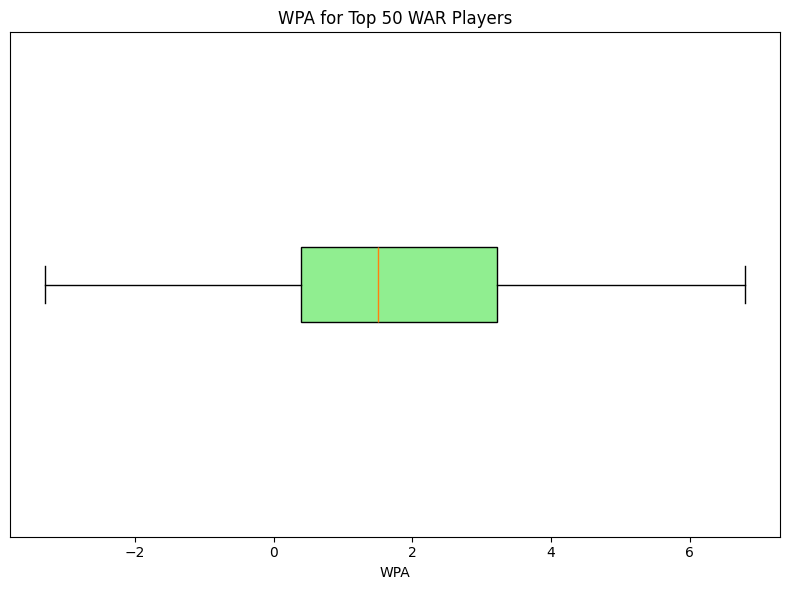

In [36]:

def get_top_50_unique_names(data):
    try:
        # Extract and rename columns 2 and 16
        column_2 = data.iloc[:, 1].rename("Player")  # Column 2 (index 1)
        column_16 = data.iloc[:, 15].rename("WAR")  # Column 16 (index 15)
        
        # Combine the two columns into a new DataFrame
        combined_data = pd.DataFrame({
            'Player': column_2,
            'WAR': column_16
        })
        
        # Sort the data based on column 16 (WAR) in descending order
        sorted_data = combined_data.sort_values(by='WAR', ascending=False)
        
        # Drop duplicates to ensure uniqueness
        unique_sorted_data = sorted_data.drop_duplicates(subset='Player').reset_index(drop=True)
        
        # Retrieve the top 50 unique rows based on column 16 (WAR)
        top_50 = unique_sorted_data.head(50)
        
        return top_50
        
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

def find_wpa_for_top_50_war(top_50_df, filepath):
    try:
        # Load the second CSV file
        data = pd.read_csv(filepath, encoding='latin1')
        
        # Extract and rename column 9 (assuming it's named "WPA")
        column_9 = data.iloc[:, 8].rename("WPA")  # Column 9 (index 8)
        
        # Combine the relevant columns into a new DataFrame
        matching_data = pd.DataFrame({
            'Player': data.iloc[:, 1],  # Column 2 (index 1)
            'WPA': column_9
        }).drop_duplicates(subset='Player')  # Drop duplicates to ensure uniqueness
        
        # Filter the rows where the names match
        matching_rows = top_50_df.merge(matching_data, on='Player', how='left')
        
        return matching_rows
        
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Define the path to your CSV file
csv_file_path = 'WAR_2023.csv'

# Check if the file exists
if not os.path.exists(csv_file_path):
    raise FileNotFoundError(f"The file '{csv_file_path}' does not exist.")

try:
    # Attempt to read the CSV file with different encodings
    try:
        data = pd.read_csv(csv_file_path, encoding='utf-8')
    except UnicodeDecodeError:
        try:
            data = pd.read_csv(csv_file_path, encoding='latin1')
        except UnicodeDecodeError:
            data = pd.read_csv(csv_file_path, encoding='iso-8859-1')
except Exception as e:
    raise ValueError(f"Error reading the CSV file: {e}")

# Ensure the CSV file has at least 18 columns
if data.shape[1] < 18:
    raise ValueError("The CSV file does not have at least 18 columns.")

# Get the top 50 unique WAR players
top_50 = get_top_50_unique_names(data)

if top_50 is not None:
    # Find the WPA for the top 50 WAR players in the second CSV
    second_csv_filepath = "WPA_2023.csv"
    matching_rows = find_wpa_for_top_50_war(top_50, second_csv_filepath)
    
    if matching_rows is not None and not matching_rows.empty:
        # Extract the WPA values
        wpa_values = matching_rows['WPA'].dropna()

        # Compute statistics for WPA values
        wpa_mean = wpa_values.mean()
        wpa_median = wpa_values.median()
        wpa_variance = wpa_values.var()
        wpa_std_dev = wpa_values.std()

        # Print the statistics for WPA values
        print("Statistics for WPA values of Top 50 WAR Players:")
        print("Sample Mean:", wpa_mean)
        print("Sample Median:", wpa_median)
        print("Sample Variance:", wpa_variance)
        print("Sample Standard Deviation:", wpa_std_dev)

        # Save the WPA values and their statistics to a new CSV file
        wpa_values_df = pd.DataFrame({'WPA': wpa_values})
        wpa_values_df.to_csv('top_50_wpa_values.csv', index=False)
        wpa_stats_df = pd.DataFrame({
            'Statistic': ['Sample Mean', 'Sample Median', 'Sample Variance', 'Sample Standard Deviation'],
            'Value': [wpa_mean, wpa_median, wpa_variance, wpa_std_dev]
        })
        wpa_stats_df.to_csv('top_50_wpa_stats.csv', index=False)
        print("Top 50 WPA values saved to 'top_50_wpa_values.csv'")
        print("Statistics for WPA saved to 'top_50_wpa_stats.csv'")

        # Create box plot for WPA values
        plt.figure(figsize=(8, 6))
        plt.boxplot(wpa_values, vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
        plt.title('WPA for Top 50 WAR Players')
        plt.xlabel('WPA')
        plt.yticks([])  # Remove the left side numbers
        plt.tight_layout()
        plt.show()
    else:
        print("No matching rows found or an error occurred.")
else:
    print("Could not extract top 50 names.")


In [34]:

def get_bottom_50_unique_names(data):
    try:
        # Extract and rename columns 2 and 16
        column_2 = data.iloc[:, 1].rename("Player")  # Column 2 (index 1)
        column_16 = data.iloc[:, 15].rename("WAR")  # Column 16 (index 15)
        
        # Combine the two columns into a new DataFrame
        combined_data = pd.DataFrame({
            'Player': column_2,
            'WAR': column_16
        })
        
        # Sort the data based on column 16 (WAR) in ascending order
        sorted_data = combined_data.sort_values(by='WAR', ascending=True)
        
        # Drop duplicates to ensure uniqueness
        unique_sorted_data = sorted_data.drop_duplicates(subset='Player').reset_index(drop=True)
        
        # Retrieve the bottom 50 unique rows based on column 16 (WAR)
        bottom_50 = unique_sorted_data.head(50)
        
        return bottom_50
        
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

def find_wpa_for_bottom_50_war(bottom_50_df, filepath):
    try:
        # Load the second CSV file
        data = pd.read_csv(filepath, encoding='latin1')
        
        # Extract and rename column 9 (assuming it's named "WPA")
        column_9 = data.iloc[:, 8].rename("WPA")  # Column 9 (index 8)
        
        # Combine the relevant columns into a new DataFrame
        matching_data = pd.DataFrame({
            'Player': data.iloc[:, 1],  # Column 2 (index 1)
            'WPA': column_9
        })
        
        # Filter the rows where the names match
        matching_rows = bottom_50_df.merge(matching_data, on='Player', how='left')
        
        return matching_rows
        
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Load the first CSV and get the bottom 50 unique WAR players
data = pd.read_csv("WAR_2023.csv", encoding='latin1')
bottom_50 = get_bottom_50_unique_names(data)

if bottom_50 is not None:
    # Find the WPA for the bottom 50 WAR players in the second CSV
    second_csv_filepath = "WPA_2023.csv"
    matching_rows = find_wpa_for_bottom_50_war(bottom_50, second_csv_filepath)
    
    if matching_rows is not None and not matching_rows.empty:
        print("Matching rows found in the second CSV:")
        print(matching_rows)
    else:
        print("No matching rows found or an error occurred.")
else:
    print("Could not extract bottom 50 names.")


Matching rows found in the second CSV:
             Player  WAR  WPA
0      Tim Anderson -2.0 -4.1
1       Jean Segura -1.9 -1.7
2      Oscar Colás* -1.5 -2.2
3     Gavin Sheets* -1.5 -0.6
4   Michael Toglia# -1.5 -1.3
..              ...  ...  ...
61       Masyn Winn -0.6 -1.1
62        Wil Myers -0.6 -1.4
63   Hunter Renfroe -0.6 -1.6
64   Hunter Renfroe -0.6 -1.2
65   Hunter Renfroe -0.6 -0.4

[66 rows x 3 columns]


Statistics for WPA values of Bottom 50 WAR Players:
Sample Mean: -1.158
Sample Median: -1.15
Sample Variance: 0.5759551020408162
Sample Standard Deviation: 0.7589170587362075
Bottom 50 WPA values saved to 'bottom_50_wpa_values.csv'
Statistics for WPA saved to 'bottom_50_wpa_stats.csv'


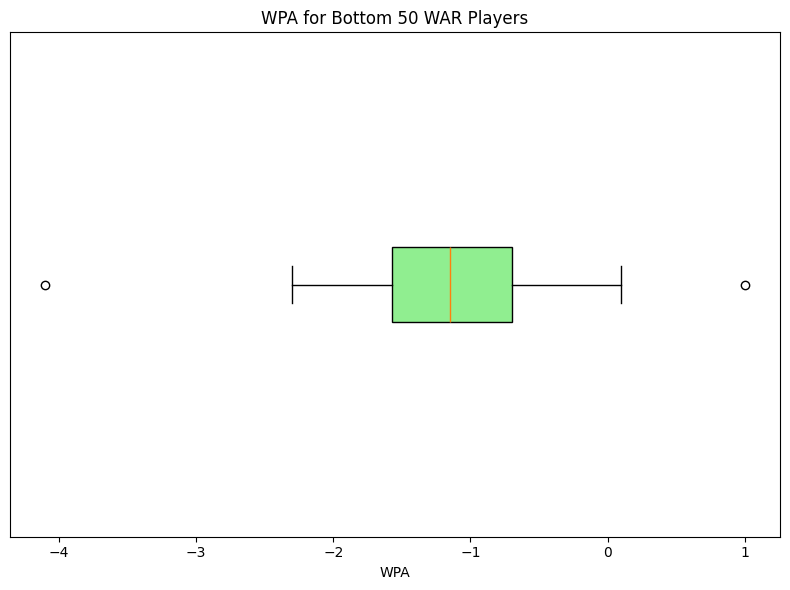

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def get_bottom_50_unique_names(data):
    try:
        # Extract and rename columns 2 and 16
        column_2 = data.iloc[:, 1].rename("Player")  # Column 2 (index 1)
        column_16 = data.iloc[:, 15].rename("WAR")  # Column 16 (index 15)
        
        # Combine the two columns into a new DataFrame
        combined_data = pd.DataFrame({
            'Player': column_2,
            'WAR': column_16
        })
        
        # Sort the data based on column 16 (WAR) in ascending order
        sorted_data = combined_data.sort_values(by='WAR', ascending=True)
        
        # Drop duplicates to ensure uniqueness
        unique_sorted_data = sorted_data.drop_duplicates(subset='Player').reset_index(drop=True)
        
        # Retrieve the bottom 50 unique rows based on column 16 (WAR)
        bottom_50 = unique_sorted_data.head(50)
        
        return bottom_50
        
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

def find_wpa_for_bottom_50_war(bottom_50_df, filepath):
    try:
        # Load the second CSV file
        data = pd.read_csv(filepath, encoding='latin1')
        
        # Extract and rename column 9 (assuming it's named "WPA")
        column_9 = data.iloc[:, 8].rename("WPA")  # Column 9 (index 8)
        
        # Combine the relevant columns into a new DataFrame
        matching_data = pd.DataFrame({
            'Player': data.iloc[:, 1],  # Column 2 (index 1)
            'WPA': column_9
        }).drop_duplicates(subset='Player')  # Drop duplicates to ensure uniqueness
        
        # Filter the rows where the names match
        matching_rows = bottom_50_df.merge(matching_data, on='Player', how='left')
        
        return matching_rows
        
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Define the path to your CSV file
csv_file_path = 'WAR_2023.csv'

# Check if the file exists
if not os.path.exists(csv_file_path):
    raise FileNotFoundError(f"The file '{csv_file_path}' does not exist.")

try:
    # Attempt to read the CSV file with different encodings
    try:
        data = pd.read_csv(csv_file_path, encoding='utf-8')
    except UnicodeDecodeError:
        try:
            data = pd.read_csv(csv_file_path, encoding='latin1')
        except UnicodeDecodeError:
            data = pd.read_csv(csv_file_path, encoding='iso-8859-1')
except Exception as e:
    raise ValueError(f"Error reading the CSV file: {e}")

# Ensure the CSV file has at least 18 columns
if data.shape[1] < 18:
    raise ValueError("The CSV file does not have at least 18 columns.")

# Get the bottom 50 unique WAR players
bottom_50 = get_bottom_50_unique_names(data)

if bottom_50 is not None:
    # Find the WPA for the bottom 50 WAR players in the second CSV
    second_csv_filepath = "WPA_2023.csv"
    matching_rows = find_wpa_for_bottom_50_war(bottom_50, second_csv_filepath)
    
    if matching_rows is not None and not matching_rows.empty:
        # Extract the WPA values
        wpa_values = matching_rows['WPA'].dropna()

        # Compute statistics for WPA values
        wpa_mean = wpa_values.mean()
        wpa_median = wpa_values.median()
        wpa_variance = wpa_values.var()
        wpa_std_dev = wpa_values.std()

        # Print the statistics for WPA values
        print("Statistics for WPA values of Bottom 50 WAR Players:")
        print("Sample Mean:", wpa_mean)
        print("Sample Median:", wpa_median)
        print("Sample Variance:", wpa_variance)
        print("Sample Standard Deviation:", wpa_std_dev)

        # Save the WPA values and their statistics to a new CSV file
        wpa_values_df = pd.DataFrame({'WPA': wpa_values})
        wpa_values_df.to_csv('bottom_50_wpa_values.csv', index=False)
        wpa_stats_df = pd.DataFrame({
            'Statistic': ['Sample Mean', 'Sample Median', 'Sample Variance', 'Sample Standard Deviation'],
            'Value': [wpa_mean, wpa_median, wpa_variance, wpa_std_dev]
        })
        wpa_stats_df.to_csv('bottom_50_wpa_stats.csv', index=False)
        print("Bottom 50 WPA values saved to 'bottom_50_wpa_values.csv'")
        print("Statistics for WPA saved to 'bottom_50_wpa_stats.csv'")

        # Create box plot for WPA values
        plt.figure(figsize=(8, 6))
        plt.boxplot(wpa_values, vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
        plt.title('WPA for Bottom 50 WAR Players')
        plt.xlabel('WPA')
        plt.yticks([])  # Remove the left side numbers
        plt.tight_layout()
        plt.show()
    else:
        print("No matching rows found or an error occurred.")
else:
    print("Could not extract bottom 50 names.")


$μ_2$ = war and  $μ_1$ = wpi 

this formula does this this and this
will explain this this and this

this is how ive applied it to my two datasets

show box plot


# Hypothesis Tests - Results and Discusssion

To determine whether there is a correlation between WAR and winning percentage and WPA, a pooled variance t-test must be implemented, this is due to the ratio of the variances being less than three, as seen in Figures 2 and 3. This calculation assumes that the population data is not heavily skewed. The calculation of the test statistic (t) is calculated using:

$\bar{X_1} =  51.9$

$\bar{X_2} =  48.9$

$S_1 =  0.423$

$S_2 =  0.168$

$n_1 = 50$

$n_2 = 50$


Using those values, t can be found:

$t = \frac{(\bar{X_1} - \bar{X_2}) - (\mu_1 - \mu_2)}{\sqrt{s_p^2 \left(\frac{1}{n_1} + \frac{1}{n_2}\right)}}$


Where:

$s_p^2 = \frac{(n_1 - 1) s_1^2 + (n_2 - 1) s_2^2}{(n_1 - 1) + (n_2 - 1)}$


In [60]:
# Given values
X1_bar = 51.9
X2_bar = 48.9
S1 = 0.423
S2 = 0.168
n1 = 50
n2 = 50

# Calculating s_p^2
s_p2 = ((n1 - 1) * S1**2 + (n2 - 1) * S2**2) / ((n1 - 1) + (n2 - 1))

# Calculating t
mu1_minus_mu2 = 0  # Assuming (μ1 - μ2) = 0 for the null hypothesis
t = (X1_bar - X2_bar - mu1_minus_mu2) / ((s_p2 * (1/n1 + 1/n2)) ** 0.5)

# Output the result
print(f"The calculated t-value is: {t}")


The calculated t-value is: 46.60801889103182


As the test statistic follows a $ n1+n2-2 $ distribution, the degrees of freedom = 

$n_1+n_2-2;   50+50-2$

If we assume that the significance level α = 0.05, the critical value is:




±*t* 46.59 = ±1.984


For this example of WAR and team winning percentage, we reject the null hypothesis \(H_0\) if \(t > 1.984\) or \(t < -1.984\). As \(46.59\) is greater than \(1.984\), we reject the null hypothesis in favour of the alternative hypothesis \(H_A\). The p-value tells us how likely it is for the data obtained to occur under the null hypothesis (Bevans, 2022). To find the p-value, Excel’s `T.DIST` function will be utilized, using \(t = 46.59\) and degrees of freedom = 98. Therefore, the p-value is extremely small, essentially zero, indicating a significant difference between the means.



Using $\alpha = 0.05$, a confidence interval of 95% must be constructed:

$(51.9 - 48.9) \pm 1.984 \sqrt{s_p^2 \left(\frac{1}{50} + \frac{1}{50}\right)}$

We are therefore 95% confident that the mean value of team winning percentage is between 2.87229 and 3.12771.

The second hypothesis test that will be carried out is between WAR and WPA. It will follow a pooled variance t-test:

$\bar{X}_1 = 1.792$, $\bar{X}_2 = -1.158$, $S_1 = 2.099$, $S_2 = 0.759$, $n_1 = 50$, $n_2 = 50$


Using the above values, t can be found 

In [3]:
# Given values
X1_bar = 1.792
X2_bar = -1.158
S1 = 2.099
S2 = 0.759
n1 = 50
n2 = 50

# Calculating s_p^2
s_p2 = ((n1 - 1) * S1**2 + (n2 - 1) * S2**2) / ((n1 - 1) + (n2 - 1))

# Calculating t
mu1_minus_mu2 = 0  # Assuming (μ1 - μ2) = 0 for the null hypothesis
t = (X1_bar - X2_bar - mu1_minus_mu2) / ((s_p2 * (1/n1 + 1/n2)) ** 0.5)

# Output the result
print(f"The calculated t-value is: {t}")


The calculated t-value is: 9.345666943853194


Assuming $\alpha = 0.05$ and the degrees of freedom = 98, the critical value is:

In [16]:
from scipy.stats import t

# Given values
alpha = 0.05
df = 98

# Calculating the critical t-value for a two-tailed test
critical_value = t.ppf(1 - alpha / 2, df)

print(f"The critical t-value is: {critical_value:.4f}")


The critical t-value is: 1.9845


±*t* 98,0.05 = ± 1.9845

In this example of WAR and WPA, we reject the null hypothesis if $t > 1.984$ or $t < -1.984$. As $9.35$ is greater than $1.984$, we reject the null hypothesis, $H_0$, in favour of the alternative hypothesis of $H_A$. To calculate the p-value, the same T.DIST Excel function is implemented. The p-value $= 1.27 \times 10^{-12}$, which $\approx 0$.


Using $\alpha = 0.05$, a confidence interval of 95% must be constructed:

$(1.792 - (-1.158)) \pm 9.35 \sqrt{\left(\frac{1}{50} + \frac{1}{50}\right)}$


we are 95% confident that the mean scores of WPA will be between 1.08 and 4.82